In [2]:
import econpizza as ep
import matplotlib.pyplot as plt

In [36]:
model = ep.load('rbc.yaml',
                raise_errors=True,
                verbose=True)
_ = model.solve_stst()
model.steady_state
shk = ('e_a', 0.01 )

x1, flag = model.find_path(shock=shk)

(load:) Loading cached model.
(solve_stst:) Steady state already known.
    Iteration   1 | max error 1.42e-02 | lapsed 0.0090s
    Iteration   2 | max error 1.98e-17 | lapsed 0.0122s
(find_path:) Stacking done (0.021s). The solution converged.


/Users/carlosortiz/econ_pizza_macro/venv/lib/python3.11/site-packages/econpizza/parser/__init__.py:262: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  init_wf = jnp.array(None)
/Users/carlosortiz/econ_pizza_macro/venv/lib/python3.11/site-packages/econpizza/solvers/stacking.py:83: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  dist0 = jnp.array(init_dist) if init_dist is not None else jnp.array(


In [37]:
model.parameters

['phi',
 'sigma',
 'alpha',
 'ybar',
 'kbar',
 'cbar',
 'lbar',
 'rbar',
 'abar',
 'beta',
 'rho',
 'delta',
 'psi']

In [38]:
model2 = ep.load('rbc.yaml',
                 raise_errors=True,
                 verbose=True)
model2['steady_state']['fixed_values']['sigma'] = 4
_ = model2.solve_stst()
model2.steady_state
shk = ('e_a', 0.01 )

x2, flag = model2.find_path(shock=shk)

(load:) Loading cached model.
    Iteration   1 | max. error 3.80e+00 | lapsed 0.0005
(solve_stst:) Steady state found (0.015908s). The solution converged.
    Iteration   1 | max error 1.54e-02 | lapsed 0.2218s
    Iteration   2 | max error 2.76e-17 | lapsed 0.2236s
(find_path:) Stacking done (0.226s). The solution converged.


In [39]:
model3 = ep.load('rbc.yaml', raise_errors=True, verbose=True)
model3['steady_state']['fixed_values']['phi'] = 4
_ = model3.solve_stst()
model3.steady_state
shk = ('e_a', 0.01)

x3, flag = model3.find_path(shock=shk)

(load:) Loading cached model.
    Iteration   1 | max. error 4.75e+00 | lapsed 0.0003
(solve_stst:) Steady state found (0.013859s). The solution converged.


/Users/carlosortiz/econ_pizza_macro/venv/lib/python3.11/site-packages/econpizza/parser/__init__.py:262: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  init_wf = jnp.array(None)
/Users/carlosortiz/econ_pizza_macro/venv/lib/python3.11/site-packages/econpizza/solvers/stacking.py:83: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  dist0 = jnp.array(init_dist) if init_dist is not None else jnp.array(


    Iteration   1 | max error 1.15e-02 | lapsed 0.1958s
    Iteration   2 | max error 1.43e-17 | lapsed 0.1981s
(find_path:) Stacking done (0.201s). The solution converged.


In [40]:
x = [x1, x2, x3]

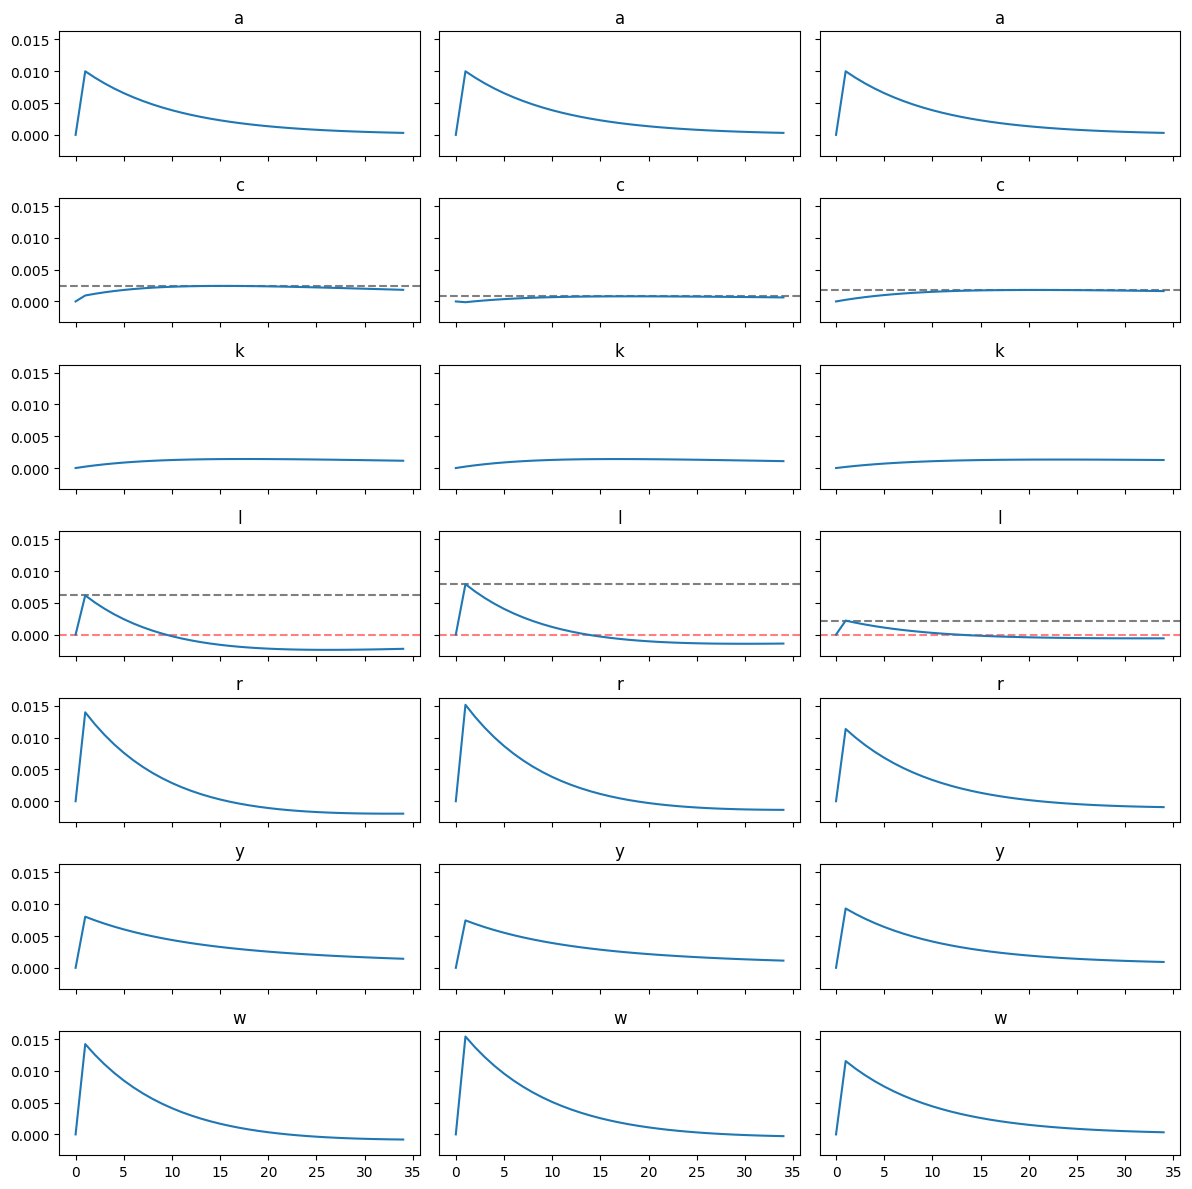

In [41]:
fig, axes = plt.subplots(7,
                         len(x),
                         sharex=True,
                         sharey=True,
                          figsize=(12, 12))

vars = ['a', 'c', 'k', 'l', 'r', 'y', 'w']

for i, ax in enumerate(axes):
  var = vars[i]
  for idx, a in enumerate(ax):
    m = x[idx]
    if var == 'c':
      a.axhline(max(m[:35, i]),
                color='k',
                ls='--',
                alpha=0.5)
    if var == 'l':
      a.axhline(max(m[:35, i]), color='k',
                ls='--',
                alpha=0.5)
      a.axhline(0, color='r', ls='--', alpha=0.5)
    a.plot(m[:35, i])
    a.set_title(var)

fig.tight_layout()